First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Missing values in dataset:
price               0
area                

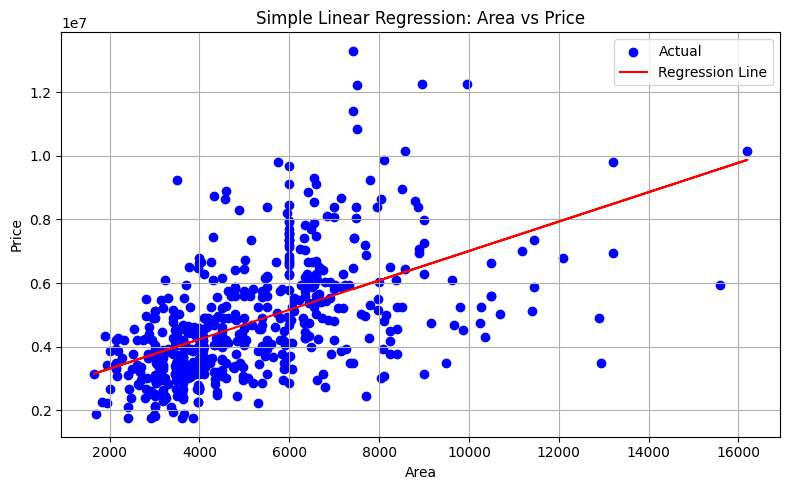

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Load and explore the dataset
df = pd.read_csv('Housing.csv')
print("First 5 rows of the dataset:")
print(df.head())

# Step 2: Preprocess the data
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print("\nEncoded DataFrame columns:")
print(df_encoded.columns)

# Step 3: Split data into train and test sets
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 6: Interpret model coefficients
print("\nModel Intercept:", model.intercept_)

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coeff_df)

# Step 7: Plot regression line (Simple Regression: Area vs Price)
# Only works meaningfully for a single feature
plt.figure(figsize=(8, 5))
plt.scatter(df['area'], df['price'], color='blue', label='Actual')
simple_model = LinearRegression()
simple_model.fit(df[['area']], df['price'])
plt.plot(df['area'], simple_model.predict(df[['area']]), color='red', label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()